<a href="https://colab.research.google.com/github/Renjith5753/Deep-learning/blob/main/Clothing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print (tf.__version__ )

2.8.0


In [ ]:
dataset = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
classnames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print('train size' ,train_images.shape) 
print('test size' ,test_images.shape) 
print ('class label length of train and test data',len(train_labels),'and',len(test_labels))

train size (60000, 28, 28)
test size (10000, 28, 28)
class label length of train and test data 60000 and 10000


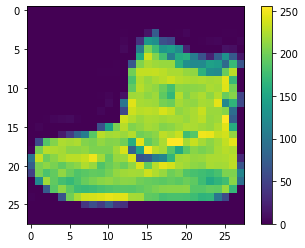

In [ ]:
#exploratory data analysis
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [ ]:
train_images = train_images/255
test_images = test_images/255

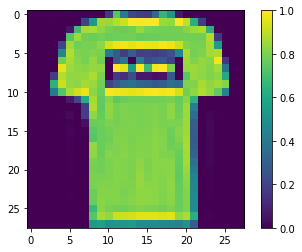

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

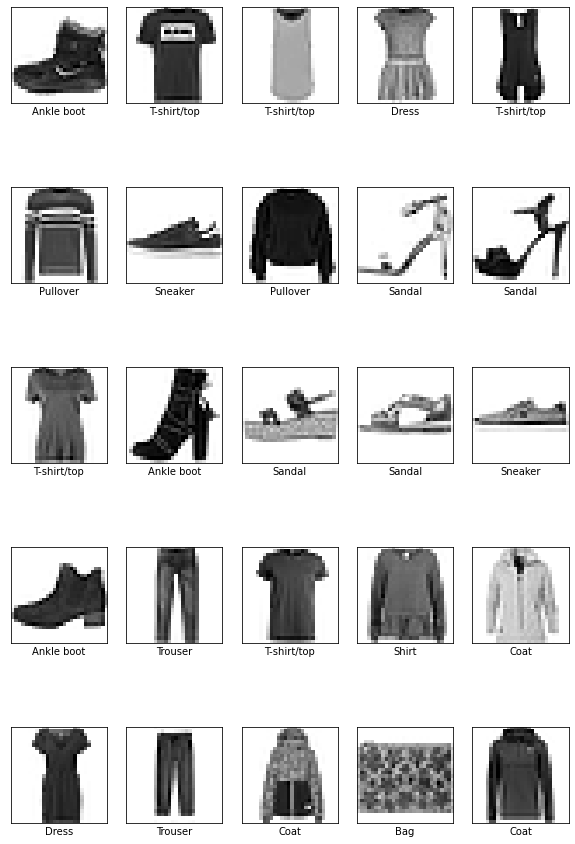

In [ ]:
  plt.figure(figsize=(10,16))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap =plt.cm.binary)
    plt.xlabel(classnames[train_labels[i]])
plt.show()


Building the model


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),tf.keras.layers.Dense(128,activation= 'relu'),
                             tf.keras.layers.Dense(10,activation= 'softmax')])


In [ ]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics= ['accuracy'])

In [ ]:
a = model.fit(train_images,train_labels,epochs=10,validation_split=0.2,verbose= 2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 - 4s - loss: 0.1381 - accuracy: 0.9478 - val_loss: 0.1388 - val_accuracy: 0.9469 - 4s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.1341 - accuracy: 0.9497 - val_loss: 0.1438 - val_accuracy: 0.9446 - 4s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 3s - loss: 0.1303 - accuracy: 0.9519 - val_loss: 0.1451 - val_accuracy: 0.9452 - 3s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 3s - loss: 0.1261 - accuracy: 0.9534 - val_loss: 0.1551 - val_accuracy: 0.9427 - 3s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.1247 - accuracy: 0.9529 - val_loss: 0.1504 - val_accuracy: 0.9431 - 4s/epoch - 3ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.1224 - accuracy: 0.9539 - val_loss: 0.1690 - val_accuracy: 0.9368 - 4s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.1195 - accuracy: 0.9558 - val_loss: 0.1581 - val_accuracy: 0.9423 - 4s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.1143 - accuracy: 0.9569 - val_loss: 0.1632 - val_accuracy: 0.9392 - 4s/epoch - 2ms/step
Epoch 9/10
1500/150

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose = 2)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.3667 - accuracy: 0.8816 - 570ms/epoch - 2ms/step
0.881600022315979


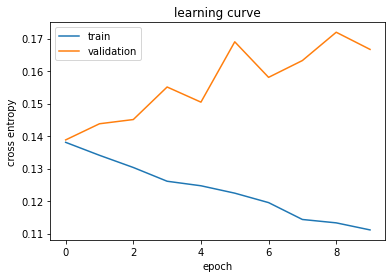

In [ ]:
plt.title('learning curve')
plt.xlabel('epoch')
plt.ylabel('cross entropy')
plt.plot(a.history['loss'],label = 'train')
plt.plot(a.history['val_loss'],label= 'validation')
plt.legend()
plt.show()